In [54]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import mlflow
import pickle

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from supervised.automl import AutoML

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

%pip uninstall tpot

# from tpot import TPOTClassifier
# import h2o
# from h2o.automl import H2OAutoML

Found existing installation: TPOT 1.0.0
Uninstalling TPOT-1.0.0:
  Would remove:
    /Users/irinakuznetsova/Desktop/dev_projects/Analytics_platforms/lab2/.venv/bin/tpot
    /Users/irinakuznetsova/Desktop/dev_projects/Analytics_platforms/lab2/.venv/lib/python3.11/site-packages/TPOT-1.0.0.dist-info/*
    /Users/irinakuznetsova/Desktop/dev_projects/Analytics_platforms/lab2/.venv/lib/python3.11/site-packages/tpot/*
Proceed (Y/n)? ^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Задание 1
#### Описание данных и визуализация данных

In [3]:
df = pd.read_csv("data/iris.data",
                header=None,
                names=['длина чашелистика', 'ширина чашелистика',
                       'длина лепестка', 'ширина лепестка', 'класс'])

In [4]:
df.head()

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["класс"].value_counts()

класс
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   длина чашелистика   150 non-null    float64
 1   ширина чашелистика  150 non-null    float64
 2   длина лепестка      150 non-null    float64
 3   ширина лепестка     150 non-null    float64
 4   класс               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


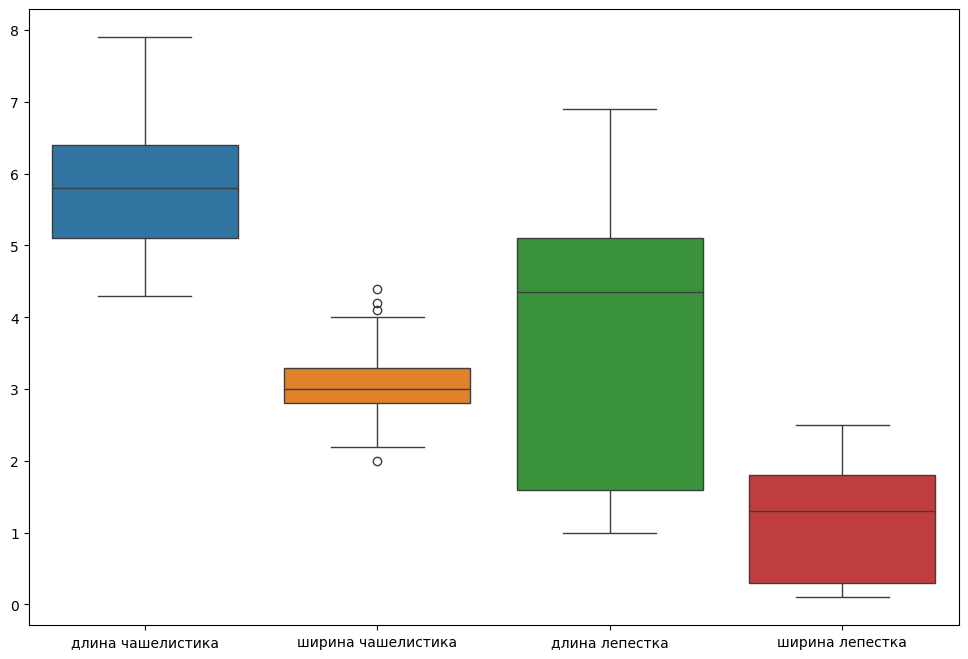

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.show()

In [9]:
df.columns

Index(['длина чашелистика', 'ширина чашелистика', 'длина лепестка',
       'ширина лепестка', 'класс'],
      dtype='object')

In [10]:
# # Исправление типа данных для числовых колонок
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
df.columns

Index(['длина чашелистика', 'ширина чашелистика', 'длина лепестка',
       'ширина лепестка', 'класс'],
      dtype='object')

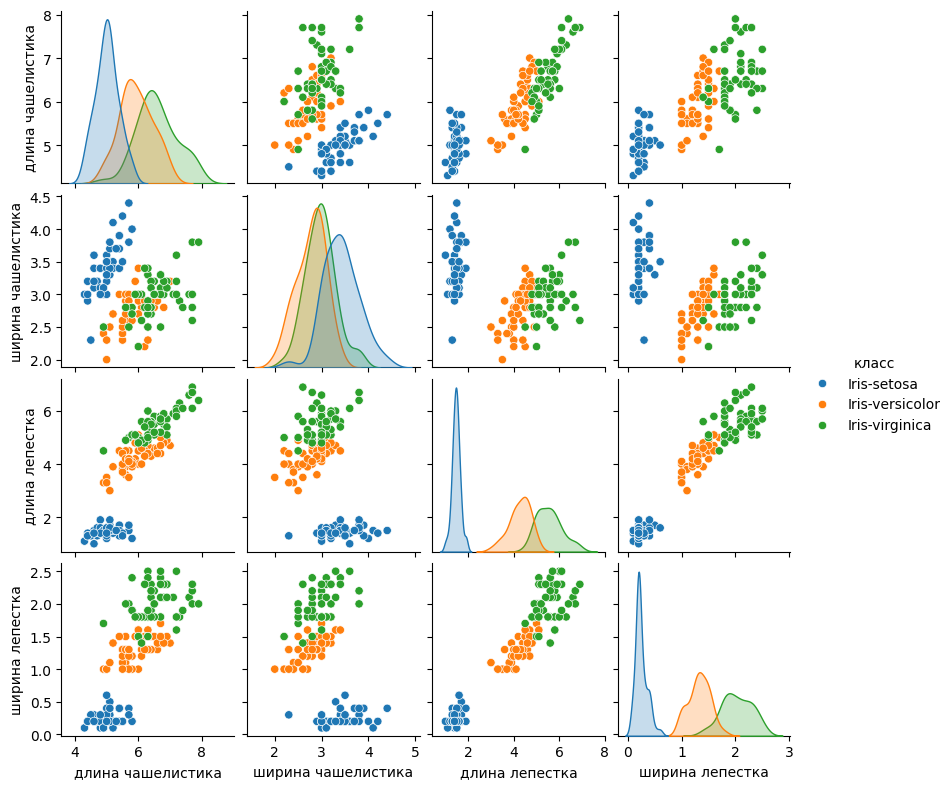

In [12]:
sns.pairplot(df, hue="класс", height=2)

## Задание 2
#### Бинарная классификация элементов

In [13]:
virginica_versicolor = df[df["класс"] != "Iris-setosa"].copy().reset_index(drop=True)

In [14]:
virginica_versicolor["constant"] = 1

In [15]:
virginica_versicolor["класс_id"] = virginica_versicolor["класс"].apply(lambda x: 
                                                  -1 if x == "Iris-versicolor"
                                                  else 1)

In [16]:
virginica_versicolor.columns

Index(['длина чашелистика', 'ширина чашелистика', 'длина лепестка',
       'ширина лепестка', 'класс', 'constant', 'класс_id'],
      dtype='object')

In [17]:
X = virginica_versicolor.drop(columns=["класс", "класс_id"]).values
y = virginica_versicolor["класс_id"].values

In [18]:
model = LogisticRegression(random_state=0, max_iter=2000)
model.fit(X, y)

LogisticRegression(max_iter=2000, random_state=0)

In [19]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])

## 3 задание 
### Переобучение модели линейной регрессиие и способы борьбы с ним

In [20]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# True relationship: y = 2 * x + 1
X = 2 * np.random.rand(100, 1)  # 100 random points in [0, 2]
y = 2 * X + 1 + np.random.randn(100, 1) * 0.5  # Add some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [21]:
# Fit a polynomial regression model (overfitting)
poly_features = PolynomialFeatures(degree=10)  # High degree for overfitting
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train) # overfitting happens here

# Predict on training and test sets for polynomial model
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

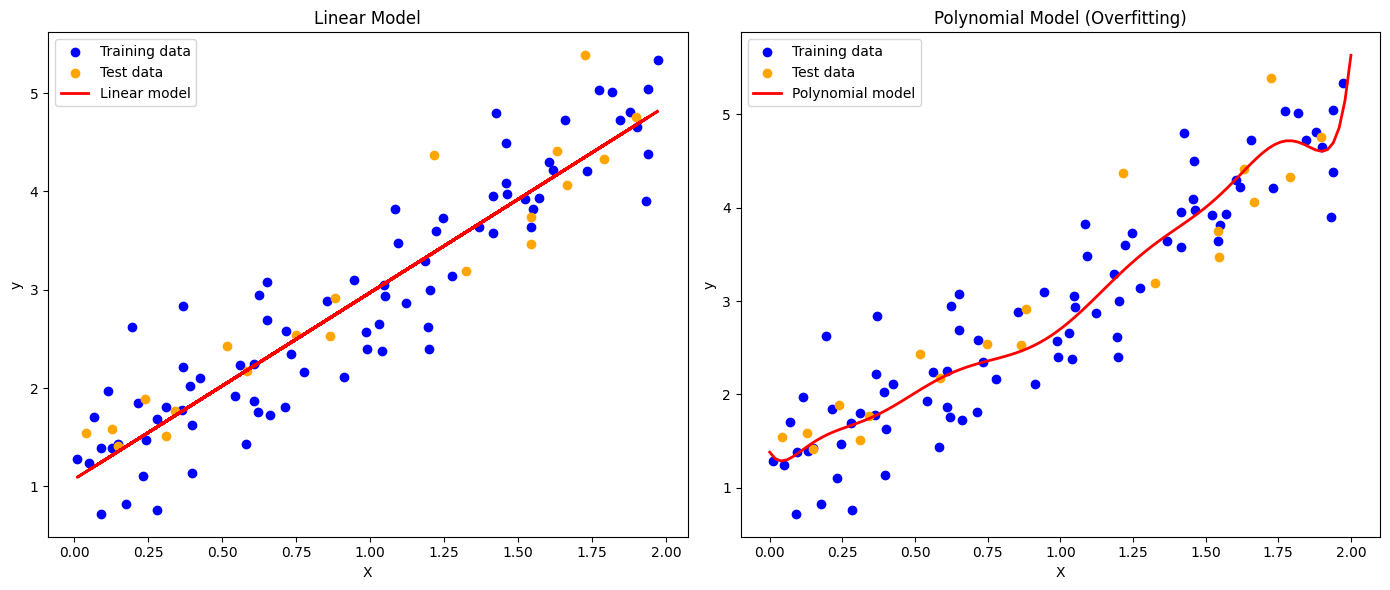

In [22]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Linear model plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
plt.plot(X_train, y_train_pred, color='red', label='Linear model', linewidth=2)
plt.title('Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Polynomial model plot
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data')
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_poly_pred = poly_model.predict(X_range_poly)
plt.plot(X_range, y_range_poly_pred, color='red', label='Polynomial model', linewidth=2)
plt.title('Polynomial Model (Overfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

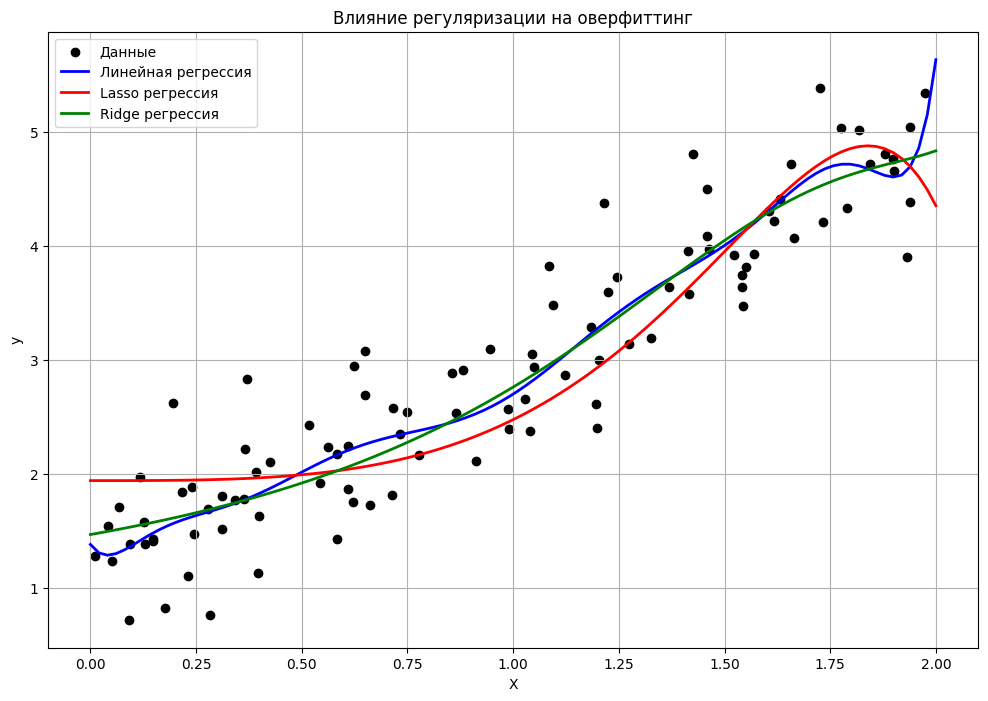

In [23]:
# Борьба с оверфиттингом
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

lasso_model = Lasso(alpha=0.1)  # Настройте alpha по мере необходимости
lasso_model.fit(X_train_poly, y_train)

ridge_model = Ridge(alpha=1.0)  # Настройте alpha по мере необходимости
ridge_model.fit(X_train_poly, y_train)

# Предсказания
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

y_linear_pred = linear_model.predict(X_plot_poly)
y_lasso_pred = lasso_model.predict(X_plot_poly)
y_ridge_pred = ridge_model.predict(X_plot_poly)

# Визуализация
plt.figure(figsize=(12, 8))

# Исходные данные
plt.scatter(X, y, color='black', label='Данные')

# Линейная регрессия
plt.plot(X_plot, y_linear_pred, color='blue', label='Линейная регрессия', linewidth=2)

# Регрессия Lasso
plt.plot(X_plot, y_lasso_pred, color='red', label='Lasso регрессия', linewidth=2)

# Регрессия Ridge
plt.plot(X_plot, y_ridge_pred, color='green', label='Ridge регрессия', linewidth=2)

plt.title('Влияние регуляризации на оверфиттинг')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


## 4 задание
### Обогащение датасета сгенерированными данными с помощью рандомной выборки нормального распределения вокруг средних значений признаков

In [24]:
df

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
def generate_samples(df, class_name, num_samples):
    class_data = df[df['класс'] == class_name]
    return pd.DataFrame({
        'длина чашелистика': np.random.normal(class_data['длина чашелистика'].mean(), class_data['длина чашелистика'].std(), num_samples),
        'ширина чашелистика': np.random.normal(class_data['ширина чашелистика'].mean(), class_data['ширина чашелистика'].std(), num_samples),
        'длина лепестка': np.random.normal(class_data['длина лепестка'].mean(), class_data['длина лепестка'].std(), num_samples),
        'ширина лепестка': np.random.normal(class_data['ширина лепестка'].mean(), class_data['ширина лепестка'].std(), num_samples),
        'класс': [class_name] * num_samples
    })

samples = 100
new_dataframes = []

for species in ('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'):
    new_dataframes.append(generate_samples(df, species, samples))

In [26]:
updated_df = pd.concat([df] + new_dataframes, ignore_index=True)

In [27]:
updated_df["constant"] = 1

In [28]:
updated_df

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс,constant
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa,1
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa,1
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa,1
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa,1
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa,1
...,...,...,...,...,...,...
445,6.449873,2.327698,4.619057,1.067330,Iris-versicolor,1
446,5.630786,2.623514,4.623292,0.981352,Iris-versicolor,1
447,4.928338,2.635906,3.717168,1.325019,Iris-versicolor,1
448,5.478157,2.914880,4.148828,1.248956,Iris-versicolor,1


## 5 Задание 
### Применение AutoML моделей

#### mljar-supervised

In [29]:
X = df[['длина чашелистика', 'ширина чашелистика', 'длина лепестка',
       'ширина лепестка']]
y = df['класс']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [31]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(X_train, y_train)

AutoML directory: AutoML_3
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.483918 trained in 9.2 seconds
2_Linear logloss 0.160822 trained in 4.73 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.079928 trained in 3.55 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.072862 trained in 0.13 seconds
AutoML fit time: 21.04 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest'],
       total_time_limit=300)

In [32]:
automl.score(X_train, y_train)

0.9777777777777777

In [33]:
y_predicted = automl.predict(X_test)
results = pd.DataFrame({"Predicted": y_predicted, "Target": np.array(y_test)})
results["correctness"] = results["Predicted"] == results["Target"]
print(results)

          Predicted           Target  correctness
0    Iris-virginica   Iris-virginica         True
1       Iris-setosa      Iris-setosa         True
2    Iris-virginica   Iris-virginica         True
3   Iris-versicolor  Iris-versicolor         True
4    Iris-virginica  Iris-versicolor        False
5    Iris-virginica   Iris-virginica         True
6    Iris-virginica   Iris-virginica         True
7   Iris-versicolor  Iris-versicolor         True
8    Iris-virginica   Iris-virginica         True
9       Iris-setosa      Iris-setosa         True
10      Iris-setosa      Iris-setosa         True
11   Iris-virginica   Iris-virginica         True
12      Iris-setosa      Iris-setosa         True
13      Iris-setosa      Iris-setosa         True
14   Iris-virginica   Iris-virginica         True


In [34]:
accuracy = results["correctness"].sum() / results["correctness"].count()
accuracy

0.9333333333333333

In [35]:
confusion_matrix_pivot = pd.pivot_table(results, 
                                         index='Target', 
                                         columns='Predicted', 
                                         aggfunc='size', 
                                         fill_value=0)

In [36]:
confusion_matrix_pivot

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
Target,,,
Iris-setosa,5,0,0
Iris-versicolor,0,2,1
Iris-virginica,0,0,7


<Axes: xlabel='Predicted', ylabel='Target'>

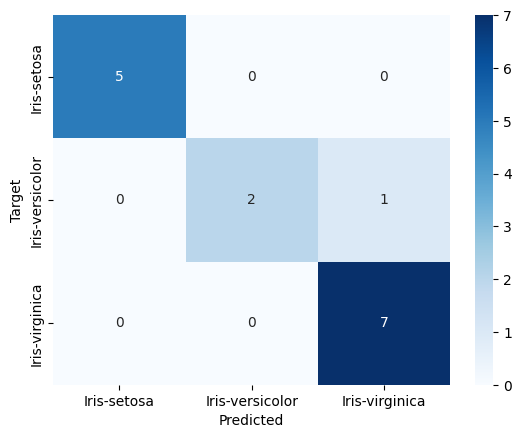

In [37]:
sns.heatmap(confusion_matrix_pivot, cmap=plt.cm.Blues, annot=True)

#### LAMA

In [38]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=0)

In [39]:
train_data["класс"].value_counts()

класс
Iris-virginica     39
Iris-setosa        34
Iris-versicolor    32
Name: count, dtype: int64

In [40]:
automl = TabularAutoML(
    task = Task('multiclass'),
    reader_params = {'cv': 5, 'random_state': 0},
)

In [41]:
train_predictions = automl.fit_predict(train_data, roles={'target': 'класс'}, verbose=0)


2025-04-28 00:25:39,988 lightautoml.automl.presets.base INFO Stdout logging level is ERROR.
2025-04-28 00:25:39,990 lightautoml.utils.timer WARNING Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
2025-04-28 00:25:39,992 lightautoml.automl.presets.base INFO Task: multiclass

2025-04-28 00:25:39,995 lightautoml.automl.presets.base INFO Start automl preset with listed constraints:
2025-04-28 00:25:39,995 lightautoml.automl.presets.base INFO - time: 3600.00 seconds
2025-04-28 00:25:39,996 lightautoml.automl.presets.base INFO - CPU: 4 cores
2025-04-28 00:25:39,997 lightautoml.automl.presets.base INFO - memory: 16 GB

2025-04-28 00:25:39,998 lightautoml.reader.base INFO Train data shape: (105, 5)

2025-04-28 00:25:47,751 lightautoml.reader.base INFO3 Feats was rejected during automatic roles guess: []
2025-04-28 00:25:47,753 lightautoml.automl.base INFO Layer 1 train process start. Time left 3592.24 secs
2025-04-28 00:25:47,758 lightautoml.m

In [42]:
print(automl.create_model_str_desc())

Models on level 0:
	 5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2
	 5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM
	 5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM
	 5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost
	 5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost

Final prediction for new objects (level 1) = 
	 1.00000 * (5 averaged models Lvl_1_Pipe_0_Mod_0_LinearL2) 


In [43]:
automl.reader.class_mapping

{'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2}

In [44]:
train_predictions_classes = np.argmax(train_predictions.data, axis = 1)
train_classes = [automl.reader.class_mapping[class_label] for class_label in train_data["класс"]]

In [45]:
print("Accuracy для обучающих данных:", {accuracy_score(train_classes, train_predictions_classes)})

Accuracy для обучающих данных: {0.9619047619047619}


In [46]:
test_predictions = automl.predict(test_data)

In [47]:
test_predictions_classes = np.argmax(test_predictions.data, axis = 1)
test_classes = [automl.reader.class_mapping[class_label] for class_label in test_data.класс]

In [48]:
print("Accuracy для тестовых данных:", {accuracy_score(test_classes, test_predictions_classes)})

Accuracy для тестовых данных: {0.9777777777777777}


In [49]:
def change_names(x):
    if x == 0:
        return 'Iris-virginica'
    if x == 1:
        return 'Iris-setosa'
    else:
        return 'Iris-versicolor'

In [50]:
res = pd.DataFrame({"prediction":test_predictions_classes, "target":test_classes})
res["prediction"] = res["prediction"].apply(change_names)
res["target"] = res["target"].apply(change_names)
res["correctness"] = res["prediction"] == res["target"]

cv = pd.pivot_table(res, 
                    index='target', 
                    columns='prediction', 
                    aggfunc='size', 
                    fill_value=0)
cv

prediction,Iris-setosa,Iris-versicolor,Iris-virginica
target,,,
Iris-setosa,16,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,0,11


<Axes: xlabel='prediction', ylabel='target'>

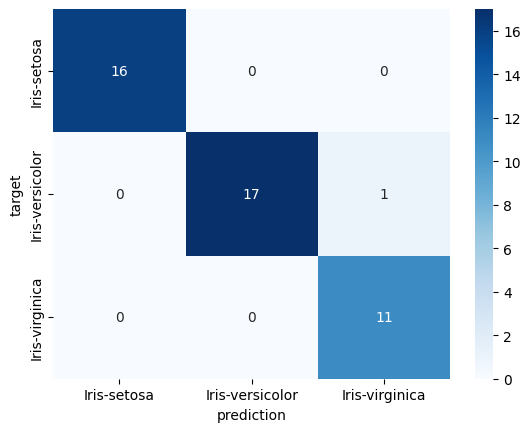

In [51]:
sns.heatmap(cv, cmap=plt.cm.Blues, annot=True)

In [52]:
with open('models/lightautoml_iris_model.pkl', 'wb') as f:
    pickle.dump(automl, f)